# imports and data

In [35]:
import argparse
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from utils import *
from classifiers import *
from preprocess import  preprocess
import matplotlib.pyplot as plt

In [36]:
seed = 42
random.seed(seed)
analyzer = 'char'
raw = pd.read_csv('C:/Users/jordi/Documents/GitHub/MUD_Labs_Git/LangDetect/data/dataset.csv')
voc_size = 100


# Process data

In [37]:
language_group_1 = {'Latin', 'Estonian', 'Indonesian', 'Swedish', 'French', 'Portuguese', 'Turkish', 'Dutch', 'English', 'Romanian', 'Spanish'}
language_group_2 = {'Pashto', 'Urdu', 'Persian', 'Arabic'}
language_group_3 = {'Japanese', 'Chinese', 'Thai', 'Korean', 'Tamil', 'Russian', 'Hindi'}
language_group_all = {'Latin', 'Estonian', 'Indonesian', 'Swedish', 'French', 'Portuguese', 'Turkish', 'Dutch', 'English', 'Romanian', 'Spanish','Pashto', 'Urdu', 'Persian', 'Arabic','Japanese', 'Chinese', 'Thai', 'Korean', 'Tamil', 'Russian', 'Hindi'}

In [38]:
# divide the dataet in 3 groups
raw_group_1 = pd.DataFrame(columns=['Text', 'language'])

for language in language_group_1:
    _aux_dataset = raw[raw['language'] == language]
    raw_group_1 = pd.concat([raw_group_1, _aux_dataset], ignore_index=True)

raw_group_2 = pd.DataFrame(columns=['Text', 'language'])

for language in language_group_2:
    _aux_dataset = raw[raw['language'] == language]
    raw_group_2 = pd.concat([raw_group_2, _aux_dataset], ignore_index=True)

raw_group_3 = pd.DataFrame(columns=['Text', 'language'])

for language in language_group_3:
    _aux_dataset = raw[raw['language'] == language]
    raw_group_3 = pd.concat([raw_group_3, _aux_dataset], ignore_index=True)

raw_group_all = pd.DataFrame(columns=['Text', 'language'])

for language in language_group_all:
    _aux_dataset = raw[raw['language'] == language]
    raw_group_all = pd.concat([raw_group_all, _aux_dataset], ignore_index=True)


In [39]:
# Split Train and Test sets
_X=raw['Text']
_y=raw['language']
X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.2, random_state=seed)

# Split Train and Test sets group 1
_X=raw_group_1['Text']
_y=raw_group_1['language']
X_train_g1, X_test_g1, y_train_g1, y_test_g1 = train_test_split(_X, _y, test_size=0.2, random_state=seed)

# Split Train and Test sets group 2
_X=raw_group_2['Text']
_y=raw_group_2['language']
X_train_g2, X_test_g2, y_train_g2, y_test_g2 = train_test_split(_X, _y, test_size=0.2, random_state=seed)

# Split Train and Test sets group 3
_X=raw_group_3['Text']
_y=raw_group_3['language']
X_train_g3, X_test_g3, y_train_g3, y_test_g3 = train_test_split(_X, _y, test_size=0.2, random_state=seed)

# Split Train and Test sets group all
_X=raw_group_all['Text']
_y=raw_group_all['language']
X_train_gall, X_test_gall, y_train_gall, y_test_gall = train_test_split(_X, _y, test_size=0.2, random_state=seed)

In [42]:
features, X_train_raw, X_test_raw = compute_features(X_train, 
                                                        X_test, 
                                                        analyzer=analyzer, 
                                                        max_features=voc_size)

X_train, X_test = normalizeData(X_train_raw, X_test_raw)


features, X_train_g1_raw, X_test_g1_raw = compute_features(X_train_g1, 
                                                        X_test_g1, 
                                                        analyzer=analyzer, 
                                                        max_features=voc_size)

X_train_g1, X_test_g1 = normalizeData(X_train_g1_raw, X_test_g1_raw)


AttributeError: lower not found

# PCA

Variance explained by PCA: [0.36918363 0.13460385]


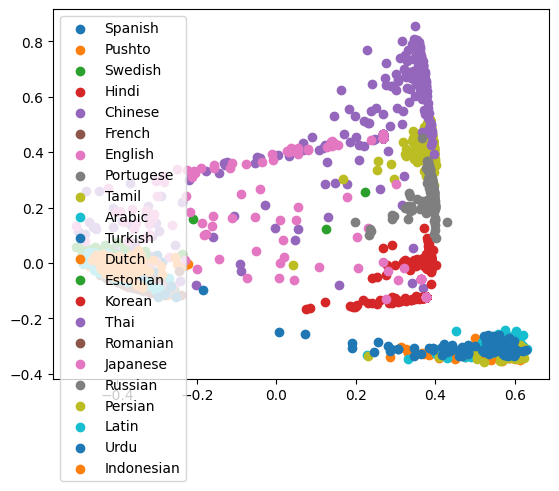

In [41]:
pca = PCA(n_components=2)
pca.fit(toNumpyArray(X_train))
pca_test = pca.transform(toNumpyArray(X_test))
print('Variance explained by PCA:', pca.explained_variance_ratio_)
y_test_list = np.asarray(y_test.tolist())
for lang in language_group_1:
    pca_x = np.asarray([i[0] for i in pca_test])[y_test_list == lang]
    pca_y = np.asarray([i[1] for i in pca_test])[y_test_list == lang]
    plt.scatter(pca_x,pca_y, label=lang)
plt.legend(loc="upper left")
plt.show()